## Quantum Representations of Audio


This notebooks goes through Quantum Representations of Audio both with Visual and Audio Examples.<br> 

The Quantum Audio package provides core functionalities for:
- **encoding** - circuit preparation given a digital audio array
- **decoding** - reconstructing of audio given a quantum circuit

This can be done through different types of schemes. As of ```v0.1.0``` support for Mult-channel schemes is included.

### Table of Contents
1. [Installation](#installation)
   - [Core Package](#installation)
   - [Digital Audio Dependencies](#installation)
   - [Notebook Dependencies](#installation)
3. [Examples with Signals](#signal-examples)
   - [Loading Signals](#signal-examples)
   - [Single-Channel Quantum Audio Scheme](#single-channel)
       - [Compare Result](#single-channel)
       - [Interaction with Shots](#single-channel)
   - [Multi-Channel Quantum Audio Scheme](#multi-channel)
       - [Compare Result](#multi-channel)
4. [Examples with Audio](#audio)
   - [Loading Audio](#audio)
   - [Interaction with Shots](#audio)
5. [References](#references)
7. [Appendix](#appendix)

### 1. Installation <a id="installation"></a>

**Note**: 
It is recommended to use an environment for the following ```pip``` commands to avoid dependency conflicts especially if you have qiskit v1.0 or later installed.<br> 
For creating environments and using them with this notebook, please refer [Appendix](#appendix).

- **Core package** <br>
  The core package can be installed using pip: ```pip install quantumaudio``` <br>
    For local installation from the cloned directory:
    ```pip install .``` or ```pip install -r requirements.txt```

- **Digital Audio Dependencies** <br>
  The core package operates with numpy arrays. Default dependecies for audio file handling to run audio examples in this notebook and scripts in the repository, can installed using pip:<br> ```pip install quantumaudio[audio_io]```<br>
    For local installation from the cloned directory: ```pip install .[audio_io]``` or manually with ```pip install soundfile librosa``` .<br>

- **Notebook Dependencies** <br>
    This notebook features interactive elements that requires additional dependencies. It can be installed using pip: ```pip install quantumaudio[notebook]```<br>
For local installation from the cloned directory: ```pip install .[notebook]``` or manually with ```pip install ipython ipywidgets ipykernel``` .<br>
<b>Note</b>: ```ipykernel``` is mentioned specifically to create kernels for notebooks. Please refer [Appendix](#appendix) for more info.

### 2. Examples with Signals <a id="signal-examples"></a>

#### Loading Signals

Digitial Audio contains many thousands of samples each second. The samples can be obtained in Python using libraries of choice such as soundfile, librosa, etc. <br>
For the purpose of visualization, the examples provided in this section uses synthetic signals with shorter number of samples.

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
signal = np.random.rand(1,8)
stereo_signal = np.random.rand(2,8)

In [3]:
from tools import plot

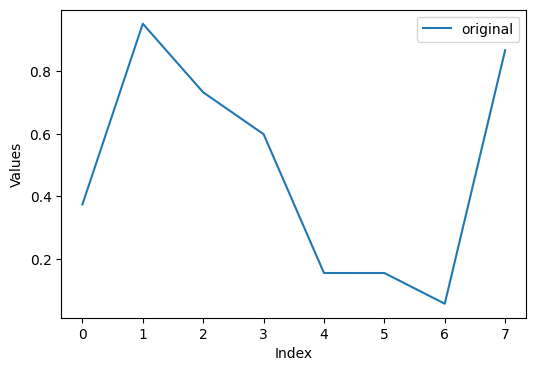

In [4]:
plot(signal)

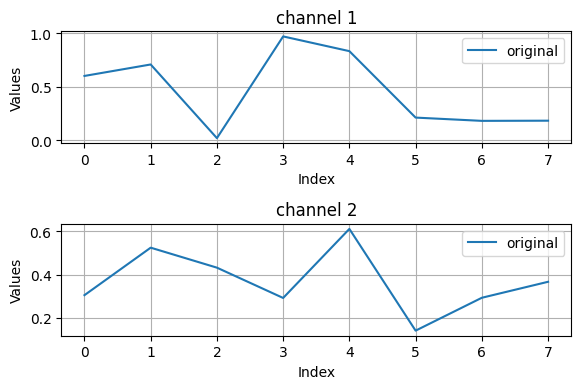

In [5]:
plot(stereo_signal)

#### Single-Channel Quantum Audio Scheme <a id="single-channel"></a>

The following schemes included in the package can be used to encode a 1-Dimensional Signal:
- QPAM   : Quantum Probability Amplitude Modulation
- SQPAM  : Single-Qubit Probability Amplitude Modulation
- QSM    : Quantum State Modulation

In [6]:
import quantumaudio

In [7]:
scheme = quantumaudio.load_scheme('sqpam') # Replace 'sqpam' with 'qsm' or 'qpam' to try them out.

Number of qubits required: 4

3 for time
1 for amplitude


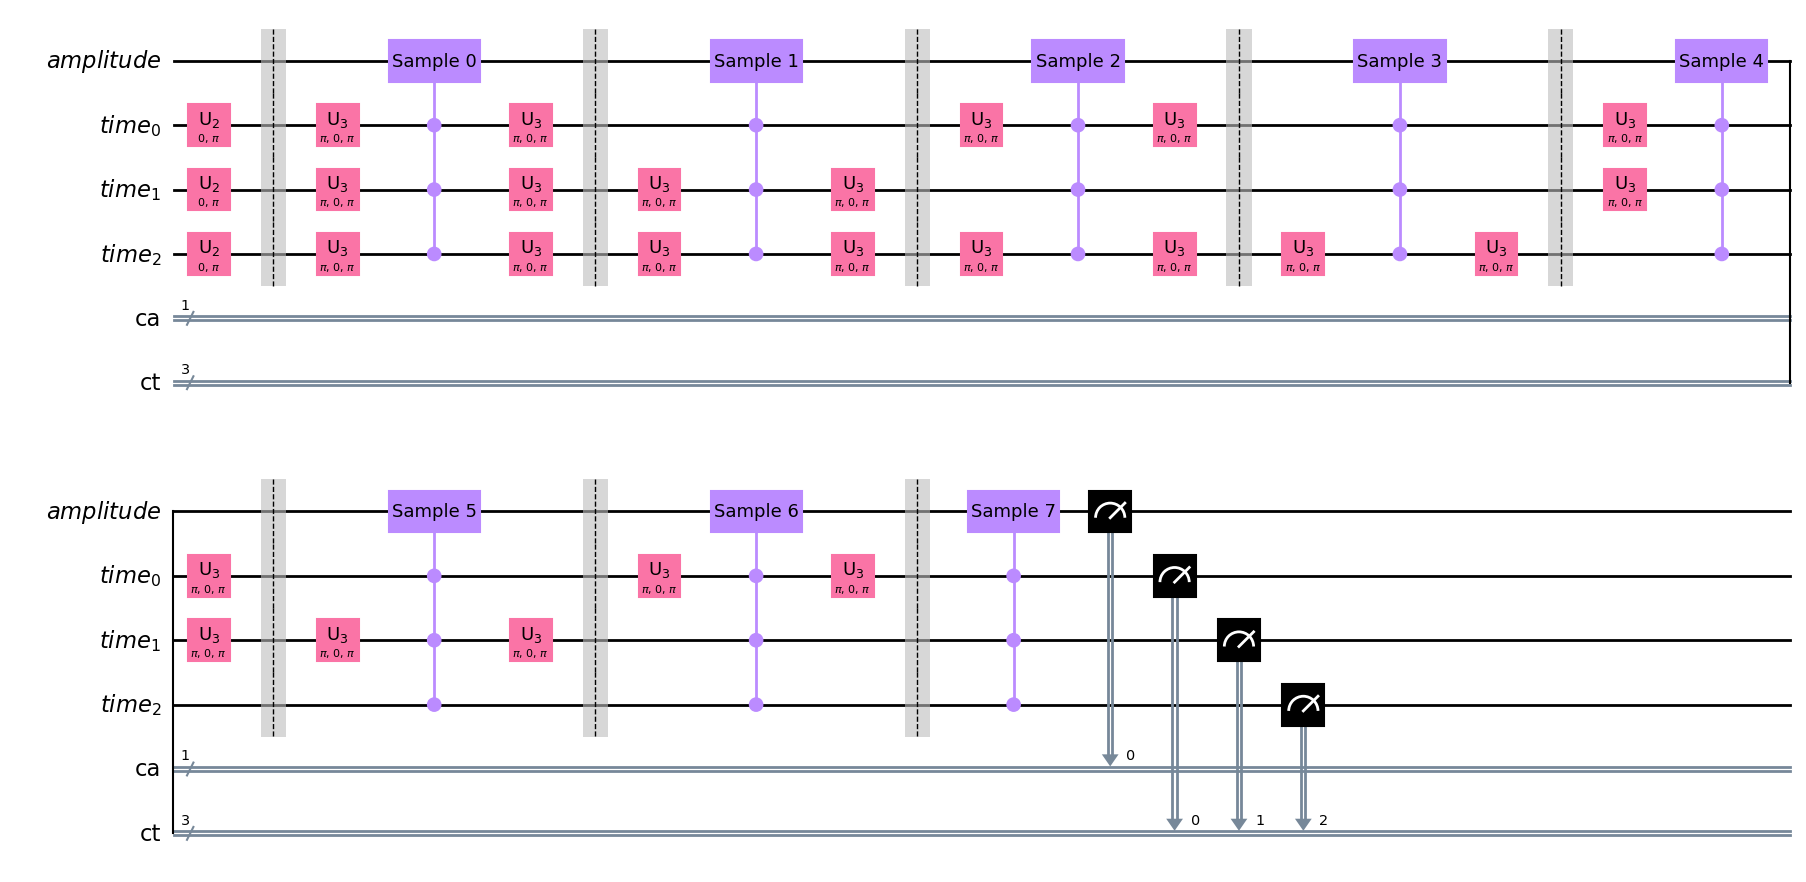

In [8]:
encoded_circuit = scheme.encode(signal,verbose=2) # verbose value 1 provides text information, 2 provides text with circuit (default). Turn off by setting it to 0.

In [9]:
decoded_signal = scheme.decode(encoded_circuit)

#### Compare Result

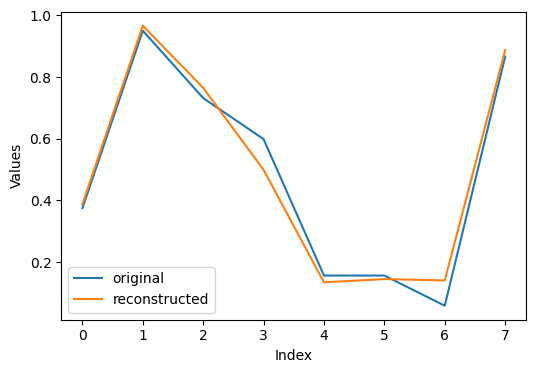

In [10]:
plot([signal,decoded_signal])

#### Interaction with Shots

Since a measurement in Quantum computing is probabilistic, it has to be repeated with N number of times (Shots) to get the probability distribution of the Quantum States of a given circuit. This section provides visualization of reconstructing a signal with respect to the number of shots.

In [11]:
from tools import interactive

In [12]:
interactive.tune(encoded_circuit,function=scheme.decode,step=2,max_value=4000,ref=signal) # a function to visualize decoding with respect to shots

interactive(children=(IntSlider(value=1, description='Shots', max=4000, min=1, step=2), Output()), _dom_classe…

<function tools.interactive.tune.<locals>.plot_function(shots)>

#### Multi-Channel Quantum Audio Scheme <a id="multi-channel"></a>

The following schemes included in the package can be used to encode a 1-Dimensional Signal:
- MSQPAM : Multi-channel Single-Qubit Probability Amplitude Modulation
- MQSM   : Multi-channel Quantum State Modulation

In [13]:
multi_channel_scheme = quantumaudio.load_scheme('mqsm') # a multi-channel quantum audio scheme. Replace 'mqsm' with 'msqpam' to try it out.

Number of qubits required: 8

3 for time
1 for channel
4 for amplitude


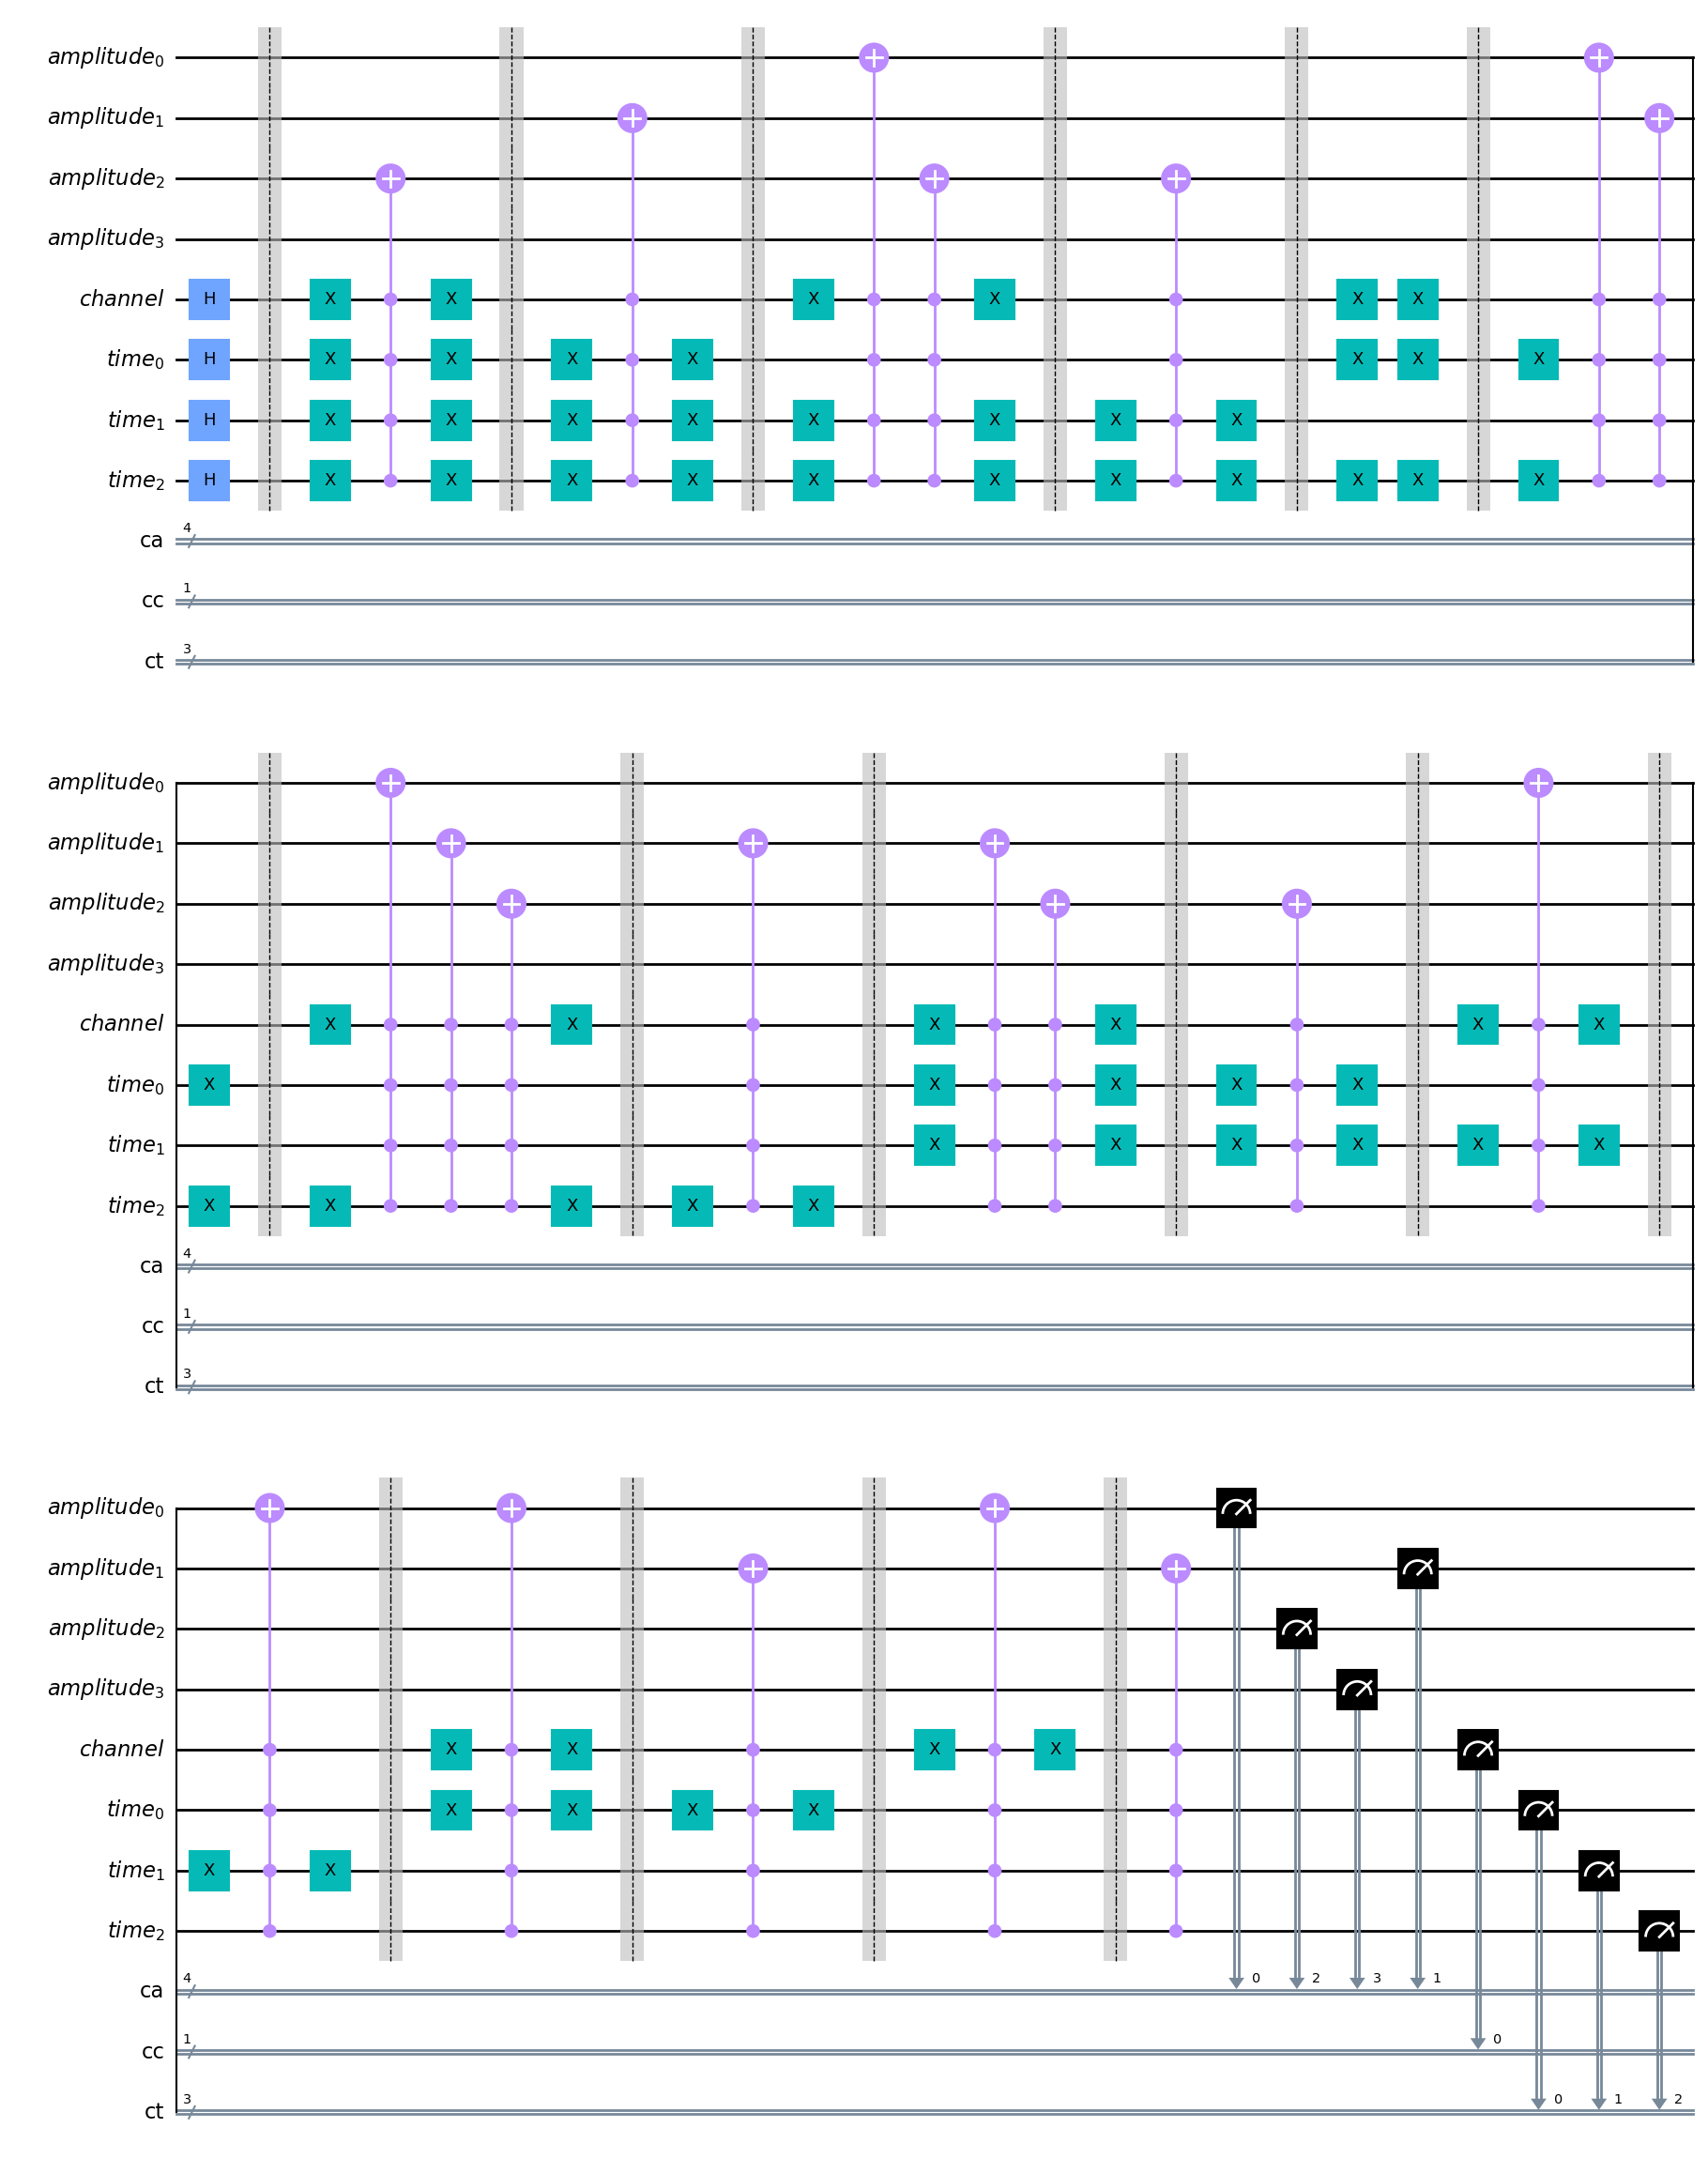

In [14]:
encoded_circuit = multi_channel_scheme.encode(stereo_signal,verbose=2) # verbose value 1 provides text information, 2 provides text with circuit (default). Turn off by setting it to 0.

In [15]:
decoded_stereo_signal = multi_channel_scheme.decode(encoded_circuit)

#### Compare Result

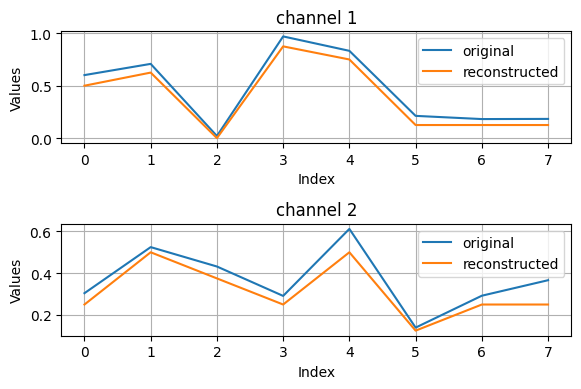

In [16]:
plot([stereo_signal,decoded_stereo_signal])

### 3) Examples with Audio <a id="audio"></a>

#### Loading Audio

The module ```audio``` contains I/O handling of digital audio using libraries librosa and soundfile. The module ```stream``` enables batch processing to efficiently process long audio files without increasing the ciruit depth.  

In [17]:
from tools import audio, stream

In [18]:
path = 'samples/lead_guitar.mp3'

In [19]:
interactive.play(audio.read(path)[0],rate=22050) # preview original audio

#### Interaction with Shots

This section provides listening to Audio Output as it reconstructs from Quantum Audio Representation with respect to the number of shots.

In [20]:
qpam = quantumaudio.load_scheme('qpam')

In [21]:
y,sr = audio.get_quantumaudio(path,scheme=qpam)

Shape: (99648,)
Num samples: 99648, Num channels: 1, Buffer size: 256
Number of chunks: 390
Shape per buffer: (1, 256)


100%|█████████████████████████████████████████| 390/390 [00:04<00:00, 89.58it/s]


In [22]:
audio_chunks = stream.get_chunks(audio.read(path)[0])

Shape: (99648,)
Num samples: 99648, Num channels: 1, Buffer size: 256
Number of chunks: 390
Shape per buffer: (1, 256)


In [23]:
interactive.tune_audio(audio_chunks,scheme=qpam,function=stream.process_chunks)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Shots', max=8000, min=1, step=1…

<function tools.interactive.tune_audio.<locals>.plot_function(shots)>

### References <a id="references"></a>

- Itaboraí, P.V., Miranda, E.R. (2022). Quantum Representations of Sound: From Mechanical Waves to Quantum Circuits. In: Miranda, E.R. (eds) Quantum Computer Music. Springer, Cham. https://doi.org/10.1007/978-3-031-13909-3_10
    
- Itaboraí, P. V. (2023) Towards Quantum Computing for Audio and Music Expression. Thesis. University of Plymouth. Available at: https://doi.org/10.24382/5119

### Appendix <a id="appendix"></a>

#### Creating an environment

An environment can be created using the following options:

- conda:
  ```conda create --name myenv python=3.10``` <br>
  To activate use:
  ```conda activate myenv```

- venv:
  ```python -m venv myenv```

  To activate:
  - MAC/Linux: ```source myenv/bin/activate```
  - Windows:  ```myenv\Scripts\activate```

#### Using Environment with Notebook

The environment can be used with notebook using the following steps:

- activate the environment in terminal
- do ```pip install ipykernel``` (can be skipped as it is already included in ```pip install quantumaudio[notebook]```)
- do ```python -m ipykernel install --user --name=kernel_name```
- In the top menu bar, go to **Kernel** and choose **Change Kernel**. Select the newly created kernel_name.  